<a href="https://colab.research.google.com/github/AmirahShoja/Amirah-Shoja-_students-total-number..-1-/blob/main/Copy_of_Fashion_MNIST_classification_with_LeNET_in_Keras_Amirah_Shoja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fashionmnist:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2243%2F9243%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240328%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240328T213632Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D43479e34c0d3cc5daa2dd1d09148c1187f3a8870bc93afcd84274b3fd46fa08ca9b4abd73c09e071e82d7a1ea31e0808812817b4b0557d81c296a1759364b0946cf84a80af9c26326507780c872dc30a9bfd35dce78eb5b06f4af3aca6055035d22abdf5874457eb4346b1e606ca7c47ebfce466678deac0544b215d20734ea25477f63605db4d13a5b85f405a80f52a678ad4b3d24f9c7a00cf6ef9f6d44f495c5ca372c172ddffcd5f4bcd86e42aff86f4109ce379239489d9105201e07a40165a5cac79b6a4aba0e3c2039755a063b98103c08e1d3def6e04f77f35c5913ddd627fcc33bd92144305e3d31e92498e3d026df2033bca670c1377bb895acdb7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 72114846 bytes downloaded
Downloaded and uncompressed: fashionmnist
Data source import complete.


<a id='Top'></a>
<center>
<h1><u>Fashion MNIST - Building CNN in Keras step by step</u></h1>
</center>
<br>

<!-- Start of Unsplash Embed Code - Centered (Embed code by @BirdyOz)-->
<div style="width:60%; margin: 20px 20% !important;">
    <img src="https://images.unsplash.com/photo-1512436991641-6745cdb1723f?ixlib=rb-1.2.1&amp;q=80&amp;fm=jpg&amp;crop=entropy&amp;cs=tinysrgb&amp;w=720&amp;fit=max&amp;ixid=eyJhcHBfaWQiOjEyMDd9" class="img-responsive img-fluid img-med" alt="assorted-color clothes lot " title="assorted-color clothes lot ">
    <div class="text-muted" style="opacity: 0.5">
        <small><a href="https://unsplash.com/photos/R2aodqJn3b8" target="_blank">Photo</a> by <a href="https://unsplash.com/@theburbgirl" target="_blank">@theburbgirl</a> on <a href="https://unsplash.com" target="_blank">Unsplash</a>, accessed 21/02/2020</small>
    </div>
</div>
<!-- End of Unsplash Embed code -->
                

In this kernel I will demonstrate how to build a simple Convolutional Neural Network (CNN) step by step using Keras, along with essentials explanations on the way. I hope you will enjoy reading this kernel (and don't forget to upvote it if you like it).

**Introduction to Zalando Fashion MNIST**

Zalando is a Germany-based (Berlin) fashion e-commerce company operating in many European countries. Because astandard MNIST dataset id currently a trivial task for most of the state-of-art neural nets Zalando decided to create a bit more challenging set. Detailed information about "Zalando Fashion MNIST" initiative you can find on their [official GitHub profile](https://github.com/zalandoresearch/fashion-mnist).

**Why CNN?**

CNN is a class of Neural Networks excelling in the classification of images (and other tasks related to images). It is based on partially connected layers (in contrast to fully-connected) and is currently a state-of-the art algorithm to perform this image-related tasks. Note that it is also technically possible to use fully connected layers but it is sub-optimal approach due to a huge number of parameters it needs to learn.

**Why Keras?**

Keras is user-friendly, modular and high-level neural network APIs. It makes reading code, building models and learning very easy. It works with TensorFlow, CNTK, Theano, MXNet, and PlaidML. More about Keras you can read the official [keras webpage](https://keras.io/) or in the [TensorFlow Guide to High-Level APIs](https://www.tensorflow.org/guide/keras).

**CONTENT**
- <a href='#1'>1. Exploring data</a>
- <a href='#2'>2. Preparing data</a>
     - <a href='#2.1'>2.1 Changing dataframe to Numpy arrays</a>
     - <a href='#2.2'>2.2 Splitting data into train and validation sets</a>
     - <a href='#2.2'>2.3 Reshaping and splitting data for Convolution Neural Network</a>
- <a href='#3'>3. Building CNN</a>
     - <a href='#3.1'>3.1 Importing necessary modules</a>
     - <a href='#3.2'>3.2 Defining the CNN architecture</a>
     - <a href='#3.3'>3.3 Compiling model</a>
     - <a href='#3.4'>3.4 Summarising model</a>
     - <a href='#3.5'>3.5 Fitting model to training data</a>
     - <a href='#3.6'>3.6 Evaluating model with test data</a>
- <a href='#4'>4. Tracking learning</a>

## <a id='1'>1. Exploring Data</a>

In [ ]:
import numpy as np                                   # linear algebra
import pandas as pd                                  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                      # library used for plotting data
from sklearn.model_selection import train_test_split # method used for splitting data set into trining and testing sets
import warnings                                      # libraries to deal with warnings
warnings.filterwarnings("ignore")

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

numpy version: 1.25.2
pandas version: 1.5.3


Loading .csv files into pandas dataframe.

In [ ]:
raw_data_train = pd.read_csv("/content/fashion-mnist_train.csv")
raw_data_test = pd.read_csv('/content/fashion-mnist_test.csv')

Looking at the head of our database.

In [ ]:
raw_data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(raw_data_train)

14673

Desired types of data here are int64 or uint64.

In [ ]:
raw_data_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

It's worth to look at histogram of pixels distribution. I will do it for a subset of 1000 images using matplotlib histogram function (use parameter *histtype="step"* to reduce the computational time).

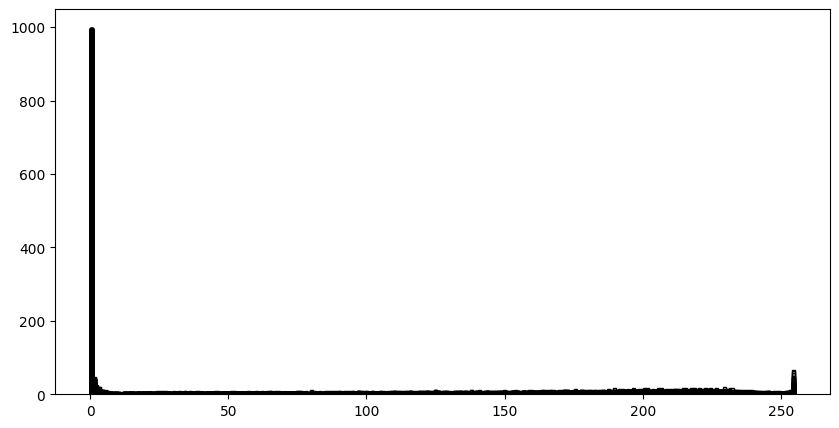

In [ ]:
subset_1 = raw_data_train.iloc[:1000,1:]
plt.subplots(figsize=(10,5))
plt.hist(subset_1, bins=256, fc='k', ec='k',histtype='step')
plt.show()

Let's visualise the first nine pictures in the raw training database. As each image is stored in a separate row we have to resize it from the flat array back to 28x28 array. Above each picture a abel will be displayed.

| Class |    Label    | Class |    Label   |
|:-----:|:-----------:|:-----:|:----------:|
|   1   | T-shirt/top |   6   |   Sandal   |
|   2   |   Trouser   |   7   |    Shirt   |
|   3   |   Pullover  |   8   |   Sneaker  |
|   4   |    Dress    |   9   |     Bag    |
|   5   |     Coat    |   10  | Ankle boot |

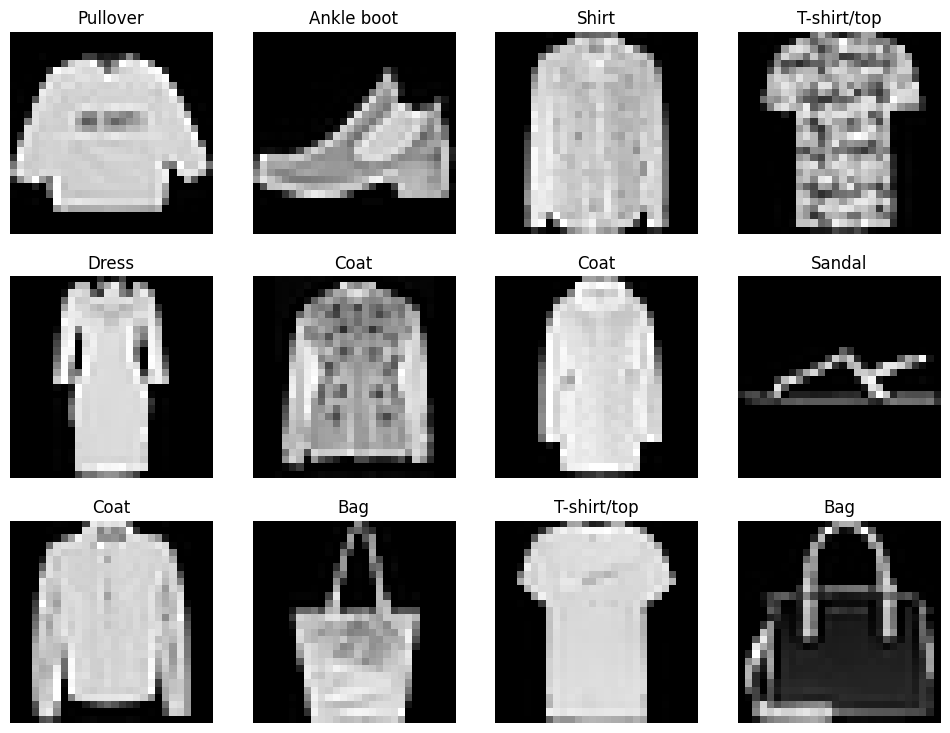

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(12,9))
for i in range(0,12):
    plt.subplot(3,4,i+1)
    image_resized = np.resize(raw_data_train.iloc[i,1:].values,(28,28))
    plt.title(class_names[raw_data_train.iloc[i,0]])
    plt.imshow(image_resized, cmap='gray', interpolation='none')
    plt.axis('off')

## <a id='2'>2. Preparing Data</a>

In this chapter a basic preparation of data will be conducted.

### <a id='2.1'>2.1 Changing dataframe to numpy arrays</a>

The images' labels are stored in the first column of the dataframe. These data are categorical so we have to one-hot encode labels: we can do it either by using keras [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) or sklearn [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) functions.

In [ ]:
X = np.array(raw_data_train.iloc[:, 1:])
y = pd.get_dummies(np.array(raw_data_train.iloc[:, 0]))

# alternative:
#from keras.utils import to_categorical
#y = to_categorical(np.array(raw_data_train.iloc[:, 0]))

### <a id='2.2'>2.2 Splitting data into train and validation sets</a>

Sklearn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) will be used to perform this operation. In this case, it will be more like train-validation split as this validation set will be used during the compilation of the model. The real test set is given to us in a separate .csv file.

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=12)

### <a id='2.3'>2.3 Reshaping and splitting data for Convolution Neural Network</a>

**Reshaping**: We have 28x28 pixels, black and white (1 channel only) pictures. Note that for a colored images we would have 3 channels (RGB).

**Splitting**: To build a well-functioning CNN model you have to follow a procedure of splitting your data into three sets: training, validation and test. In this case, I will create the validation set explicitly but if data are shuffled you can use simply *validation_split* parameter when fitting the model. More about how to create a validation set and why you need it is explained nicely on YouTube [here](https://www.youtube.com/watch?v=dzoh8cfnvnI&feature=youtu.be).

In [ ]:
im_rows, im_cols = 28, 28
input_shape = (im_rows, im_cols, 1)

# Test data
X_test = np.array(raw_data_test.iloc[:, 1:])
y_test = pd.get_dummies(np.array(raw_data_test.iloc[:, 0]))

# train and validate sets
X_train = X_train.reshape(X_train.shape[0], im_rows, im_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], im_rows, im_cols, 1)
X_test = X_test.reshape(X_test.shape[0], im_rows, im_cols, 1)

# normalisation
X_train = X_train/255
X_validate = X_validate/255
X_test = X_test/255

print("X_train shape:", X_train.shape)
print("X_validate shape:", X_validate.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_validate shape:", y_validate.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11738, 28, 28, 1)
X_validate shape: (2935, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (11738, 10)
y_validate shape: (2935, 10)
y_test shape: (10000, 10)


## <a id='3'>3. Building CNN</a>

In this chapter the CNN model will be built and run.

### <a id='3.1'>3.1 Importing necessary modules</a>

In [ ]:
import keras # main keras package
from keras.models import Sequential # sequential model
from keras.layers import Dropout, Flatten, AveragePooling2D # layers with layers operations
from keras.layers import Dense,Conv2D  # layers types


print("Keras version:", keras.__version__)

Keras version: 2.15.0


### <a id='3.2'>3.2 Defining the CNN architecture - LeNET</a>

LeNet architecture does not contain dropouts or max pooling operations which are common in modern architectures.

A **max pooling** layer reduces the number of parameters in the layer by extracting the maximum value from a "patch" of a specified size (e.g. 2X2 pixels) and reducing layers size in such a way. There are also option to use the minimum value or the average one.

A **dropout** operation "kills" specified percentage of neurons (units) on a given layer to prevent overfitting.
In order to prevent overfitting, you can also use a Batch Normalisation but it is not recommended to use dropouts and batch normalisation in a single model. This is so-called "disharmony" of dropout and batch normalization.

In [ ]:
num_classes = 10

model = Sequential()

model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(120, activation='relu'))

model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation = 'softmax'))

### <a id='3.3'>3.3 Compiling model</a>

CNN model has now to be compiled. To do so I will use:
* ADAM (ADAptive Moment estimation) **optimiser** - you can read more about this optimiser, e.g. [here](adaptive moment estimation).
* My **loss function** (what it is you can read [here](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/)) will be *categorical_crossentropy* (other options are explained [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/) - careful math ahead!)
* **Metric** will be *accuracy*

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### <a id='3.4'>3.4 Summarising model</a>

It is worth to summarise the model to see how many trainable parameters our model contains - this has a direct impact on computational power required.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d (Average  (None, 13, 13, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

### <a id='3.5'>3.5 Fitting model to training data</a>

After the model was checked it is time to fit it to the training data. I will store the fitted model in *tracker* variable to later investigate its history.

In [ ]:
tracker = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=100,
                    validation_data=(X_validate, y_validate),
                    verbose=0)

### <a id='3.6'>3.6 Evaluating model with a test data</a>

Now the model will be evaluated on test sets.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3815944790840149
Test accuracy: 0.8748000264167786


## <a id='4'>4. Tracking Learning</a>

It is possible to monitor the learning process of our model by accessing its history with *.history* attribute of previously defined *tracker*. It is worth looking at how the loss function was developing for both testing and validation sets. It is possible to spot if we have already a problem with overfitting - test set loss function will be decreasing while validation's loss function after reaching a minimum value starts to increase again.

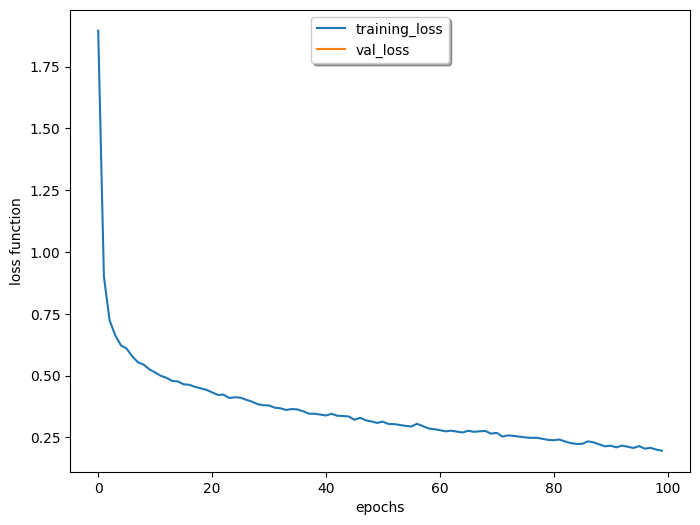

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(tracker.history["loss"], label = "training_loss")
ax.plot(tracker.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()

## <a id='5'>5. References and learning resources</a>

1. [Keras documentation](https://keras.io/)
2. [Tensorflow documentation](https://www.tensorflow.org/)
3. [Pytorch documentation](https://pytorch.org/)
4. [CNN theory on www.towarddatascience.com](https://towardsdatascience.com/deep-learning-personal-notes-part-1-lesson-3-cnn-theory-convolutional-filters-max-pooling-dbe68114848e)